In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_train  = pd.read_csv("student_addiction_dataset_train.csv")

In [42]:
df_train.head()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
0,Yes,No,No,Yes,No,No,No,Yes,No,No,No
1,No,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
2,No,No,No,No,No,Yes,Yes,Yes,No,No,No
3,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes,Yes
4,Yes,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes


In [43]:
df_train.shape

(50342, 11)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50342 entries, 0 to 50341
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Experimentation                     47780 non-null  object
 1   Academic_Performance_Decline        47844 non-null  object
 2   Social_Isolation                    47792 non-null  object
 3   Financial_Issues                    47805 non-null  object
 4   Physical_Mental_Health_Problems     47888 non-null  object
 5   Legal_Consequences                  47766 non-null  object
 6   Relationship_Strain                 47799 non-null  object
 7   Risk_Taking_Behavior                47765 non-null  object
 8   Withdrawal_Symptoms                 47730 non-null  object
 9   Denial_and_Resistance_to_Treatment  47889 non-null  object
 10  Addiction_Class                     50342 non-null  object
dtypes: object(11)
memory usage: 4.2+ MB


In [62]:
df_train.describe()

,Experimentation,Academic_Performance_Decline,Social_Isolation,Financial_Issues,Physical_Mental_Health_Problems,Legal_Consequences,Relationship_Strain,Risk_Taking_Behavior,Withdrawal_Symptoms,Denial_and_Resistance_to_Treatment,Addiction_Class
count,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000,50342.000000
mean,0.477077,0.475845,0.474713,0.476600,0.474792,0.473779,0.476938,0.473303,0.477891,0.478149,0.299392
std,0.499479,0.499421,0.499365,0.499457,0.499369,0.499317,0.499473,0.499292,0.499516,0.499527,0.457996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
columns = df_train.columns
columns

Index(['Experimentation', 'Academic_Performance_Decline', 'Social_Isolation',
       'Financial_Issues', 'Physical_Mental_Health_Problems',
       'Legal_Consequences', 'Relationship_Strain', 'Risk_Taking_Behavior',
       'Withdrawal_Symptoms', 'Denial_and_Resistance_to_Treatment',
       'Addiction_Class'],
      dtype='object')

In [46]:
for i in columns:
  print(df_train[i].unique())

['Yes' 'No' nan]
['No' 'Yes' nan]
['No' nan 'Yes']
['Yes' 'No' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
['Yes' 'No' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
['No' 'Yes']


In [47]:
for i in columns:
  print(df_train[i].value_counts())

Experimentation
Yes    24017
No     23763
Name: count, dtype: int64
Academic_Performance_Decline
Yes    23955
No     23889
Name: count, dtype: int64
Social_Isolation
Yes    23898
No     23894
Name: count, dtype: int64
Financial_Issues
Yes    23993
No     23812
Name: count, dtype: int64
Physical_Mental_Health_Problems
No     23986
Yes    23902
Name: count, dtype: int64
Legal_Consequences
No     23915
Yes    23851
Name: count, dtype: int64
Relationship_Strain
Yes    24010
No     23789
Name: count, dtype: int64
Risk_Taking_Behavior
No     23938
Yes    23827
Name: count, dtype: int64
Withdrawal_Symptoms
Yes    24058
No     23672
Name: count, dtype: int64
Denial_and_Resistance_to_Treatment
Yes    24071
No     23818
Name: count, dtype: int64
Addiction_Class
No     35270
Yes    15072
Name: count, dtype: int64


In [48]:
nan_values = df_train.isna().sum()
nan_values

Experimentation                       2562
Academic_Performance_Decline          2498
Social_Isolation                      2550
Financial_Issues                      2537
Physical_Mental_Health_Problems       2454
Legal_Consequences                    2576
Relationship_Strain                   2543
Risk_Taking_Behavior                  2577
Withdrawal_Symptoms                   2612
Denial_and_Resistance_to_Treatment    2453
Addiction_Class                          0
dtype: int64

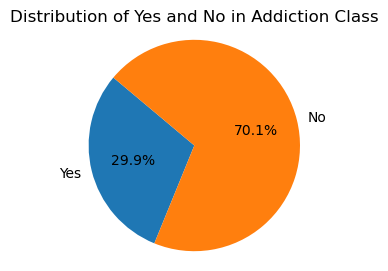

In [49]:
yes_count = df_train["Addiction_Class"].value_counts().get("Yes", 0)
no_count = df_train["Addiction_Class"].value_counts().get("No", 0)

# Calculate total count
total_count = yes_count + no_count

# Calculate percentages
yes_pct = (yes_count / total_count) * 100
no_pct = (no_count / total_count) * 100

# Create the pie chart
plt.figure(figsize=(3, 3))  # Adjust figure size as desired
plt.pie([yes_pct, no_pct], labels=['Yes', 'No'], autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Yes and No in Addiction Class")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

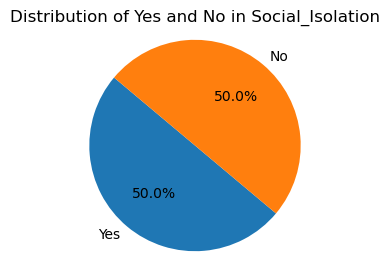

In [50]:
yes_count = df_train["Social_Isolation"].value_counts().get("Yes", 0)
no_count = df_train["Social_Isolation"].value_counts().get("No", 0)

# Calculate total count
total_count = yes_count + no_count

# Calculate percentages
yes_pct = (yes_count / total_count) * 100
no_pct = (no_count / total_count) * 100

# Create the pie chart
plt.figure(figsize=(3, 3))  # Adjust figure size as desired
plt.pie([yes_pct, no_pct], labels=['Yes', 'No'], autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Yes and No in Social_Isolation")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

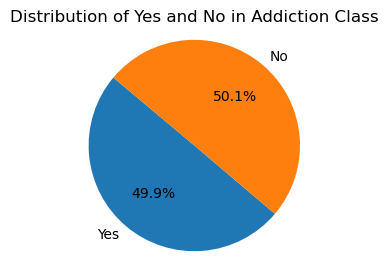

In [51]:
yes_count = df_train["Physical_Mental_Health_Problems"].value_counts().get("Yes", 0)
no_count = df_train["Physical_Mental_Health_Problems"].value_counts().get("No", 0)

# Calculate total count
total_count = yes_count + no_count

# Calculate percentages
yes_pct = (yes_count / total_count) * 100
no_pct = (no_count / total_count) * 100

# Create the pie chart
plt.figure(figsize=(3, 3))  # Adjust figure size as desired
plt.pie([yes_pct, no_pct], labels=['Yes', 'No'], autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Yes and No in Addiction Class")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

In [56]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [57]:
data = df_train.applymap(lambda x: np.random.choice([0, 1]) if pd.isna(x) else (1 if x == 'Yes' else 0))

# Identify categorical columns
categorical_features = list(data.columns)
categorical_features.remove('Addiction_Class')

# Define the preprocessing steps with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(class_weight='balanced')
}

# Split the data into training and test sets
X = data.drop('Addiction_Class', axis=1)
y = data['Addiction_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Split the data into training and test sets
X = df_train.drop('Addiction_Class', axis=1)
y = df_train['Addiction_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Experimentation',
                                                   'Academic_Performance_Decline',
                                                   'Social_Isolation',
                                                   'Financial_Issues',
                                                   'Physical_Mental_Health_Problems',
                                                   'Legal_Consequences',
                                                   'Relationship_Strain',
                                                   'Risk_Taking_Behavior',
                                                   'Withdrawal_Symptoms',
                                                   'Denial_and_Resistance_to_Treatment'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [59]:
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5080941503624987
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      7048
           1       0.31      0.51      0.39      3021

    accuracy                           0.51     10069
   macro avg       0.51      0.51      0.49     10069
weighted avg       0.59      0.51      0.53     10069



In [60]:
#Evaluate each model
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy



In [61]:
# Display the results
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")

Logistic Regression: Accuracy = 0.51
Decision Tree: Accuracy = 0.70
Random Forest: Accuracy = 0.70
Support Vector Machine: Accuracy = 0.50
